In [2]:
%run /Users/will/dsi/PortlandPD/src/functions.py
df = start_with_combined()

In [3]:
df.head()

,Address,CallNumber,FinalCallCategory,FinalCallGroup,Neighborhood,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Priority,ReportMonthYear,ResponseTime_sec,TimeInQueue_sec,TravelTime_sec
111217,7500 BLOCK OF SE REEDWAY ST,93550832,Disturbance,Disorder,Mt. Scott-Arleta,45.481633,-122.585407,7667285.0,668593.0,High,2012-01-01,326,27,299
75146,4000 BLOCK OF NE FREMONT ST,89697416,School Incident,Disorder,Beaumont-Wilshire,45.548340,-122.621264,7658730.0,693146.0,Low,2012-01-01,"1,470",261,"1,209"
151704,N DENVER AVE / N LOMBARD ST,95401674,DUII,Traffic,Kenton,45.577129,-122.686866,7642214.0,704087.0,Medium,2012-01-01,421,79,342
151703,N DENVER AVE / N LOMBARD ST,93109414,Welfare Check,Disorder,Kenton,45.577129,-122.686866,7642214.0,704087.0,Medium,2012-01-01,499,353,146
151702,N DENVER AVE / N LOMBARD ST,91547714,Welfare Check,Disorder,Kenton,45.577129,-122.686866,7642214.0,704087.0,Medium,2012-01-01,250,51,199


In [4]:
full_date_range = date_range_of_set(df, 'ReportMonthYear')
date_endpoints = [full_date_range[0], full_date_range[-1]]
# def split_df_by_date(df, date_list):
#     lst_of_dfs = []
#     for i in date_list:
#         lst_of_dfs.append((df[df['ReportMonthYear'] == i]))
#     return lst_of_dfs
start_stop_dfs = split_df_by_date(df, date_endpoints)
first_month_df = start_stop_dfs[0]
last_month_df = start_stop_dfs[1]

In [7]:
# First find the highest crime counts per neighborhood at the end-point
last_month_crime_count = choro_table(last_month_df).sort_values('Neighborhood')
first_month_crime_count = choro_table(first_month_df).sort_values('Neighborhood')
endpoint_count_differences = first_month_crime_count.copy()
endpoint_count_differences['Count'] = last_month_crime_count['Count'] - first_month_crime_count['Count']
endpoint_count_differences.sort_values('Count', ascending=False)

,Neighborhood,Count
1,Hazelwood,50.0
11,Lloyd District Community Association,39.0
12,Pearl District,25.0
5,Old Town Community Association,22.0
10,St. Johns,3.0
...,...,...
24,Mt. Scott-Arleta,-35.0
4,Lents,-99.0
3,Centennial Community Association,-109.0
2,Powellhurst-Gilbert,-139.0


In [8]:
# Check differences for individual neighborhoods:
first_month_crime_count[first_month_crime_count['Neighborhood'] == 'Powellhurst-Gilbert']

last_month_crime_count[last_month_crime_count['Neighborhood'] == 'Powellhurst-Gilbert']

,Neighborhood,Count
2,Powellhurst-Gilbert,595.0


In [11]:
# What are the counts of calls per month over the full time frame?
df_count_by_month = df.groupby('ReportMonthYear').count()['Priority']
df_count_by_month
full_df_y_vals = list(df_count_by_month)

Text(0.5, 1.0, 'Portland PD Dispatched Calls')

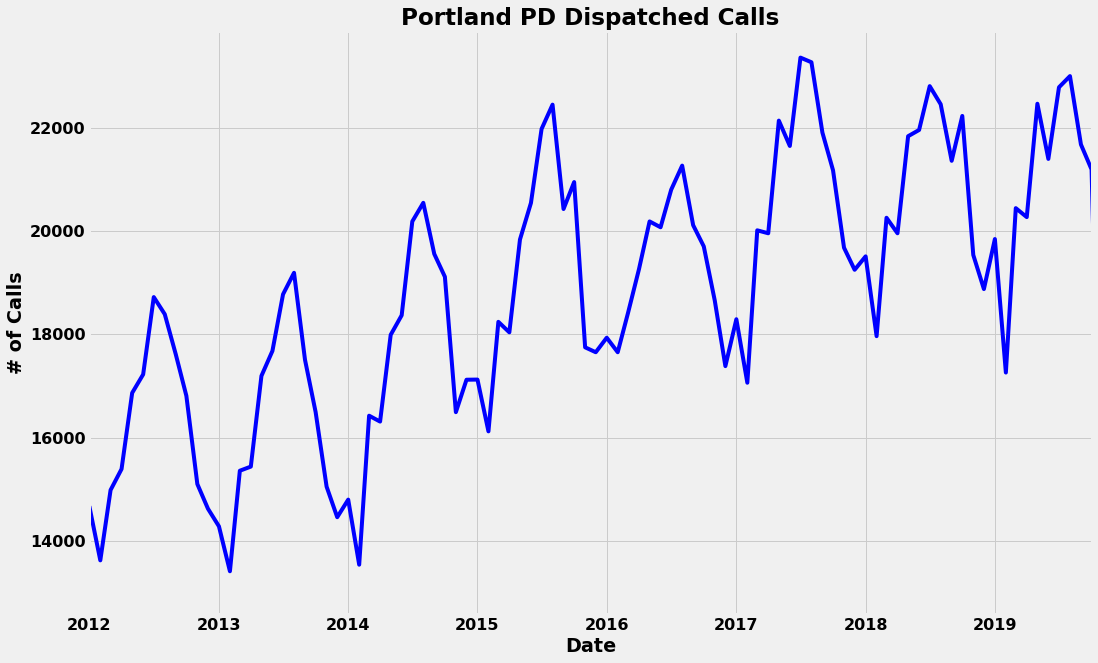

In [13]:
plt.style.use('fivethirtyeight')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)


fig, ax = plt.subplots(figsize=(16,10))
full_df_x_vals = list(df_count_by_month.index)
full_df_y_vals = list(df_count_by_month)
ax.plot(full_df_x_vals, full_df_y_vals, color='b')
ax.set_ylabel('# of Calls', fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_xlim(min(full_df_x_vals), full_df_x_vals[-2])
ax.set_title('Portland PD Dispatched Calls', fontweight='bold')
# plt.savefig('../images/total_calls_over_time.png')

In [22]:
# Add a line of vice calls to the preceding graph:
full_date_range = date_range_of_set(df, 'ReportMonthYear')
vc = df[df['FinalCallCategory'] == 'Vice']
vcs_by_month_list = split_df_by_date(vc, full_date_range)

In [25]:
# Make a list of vice dataframes split by month
vc_counts_by_month = []
for i in range(len(vcs_by_month_list)):
    vc_counts_by_month.append(vcs_by_month_list[i].groupby('ReportMonthYear').count()['Priority'])
vc_counts_by_month[0]

ReportMonthYear
2012-01-01    182
Name: Priority, dtype: int64

In [30]:
# Extract call count for vice calls per month
vc_y_vals_list = [vc_counts_by_month[i][0] for i in range(len(vc_counts_by_month))]
vc_x_vals = vc['ReportMonthYear'].unique()

# vc_x_vals
vc_y_vals_list.sort()
vc_y_vals_list

[118,
 120,
 133,
 138,
 152,
 153,
 156,
 158,
 159,
 160,
 162,
 163,
 167,
 167,
 169,
 170,
 172,
 177,
 182,
 183,
 184,
 185,
 185,
 197,
 198,
 199,
 206,
 208,
 212,
 214,
 214,
 220,
 221,
 227,
 228,
 228,
 230,
 233,
 235,
 237,
 238,
 239,
 239,
 243,
 244,
 247,
 249,
 249,
 253,
 260,
 261,
 263,
 274,
 274,
 275,
 276,
 276,
 279,
 283,
 284,
 284,
 286,
 287,
 287,
 289,
 291,
 292,
 292,
 293,
 293,
 293,
 294,
 295,
 297,
 298,
 299,
 299,
 304,
 305,
 307,
 314,
 314,
 320,
 324,
 329,
 330,
 330,
 333,
 334,
 339,
 342,
 343,
 352,
 356,
 360]

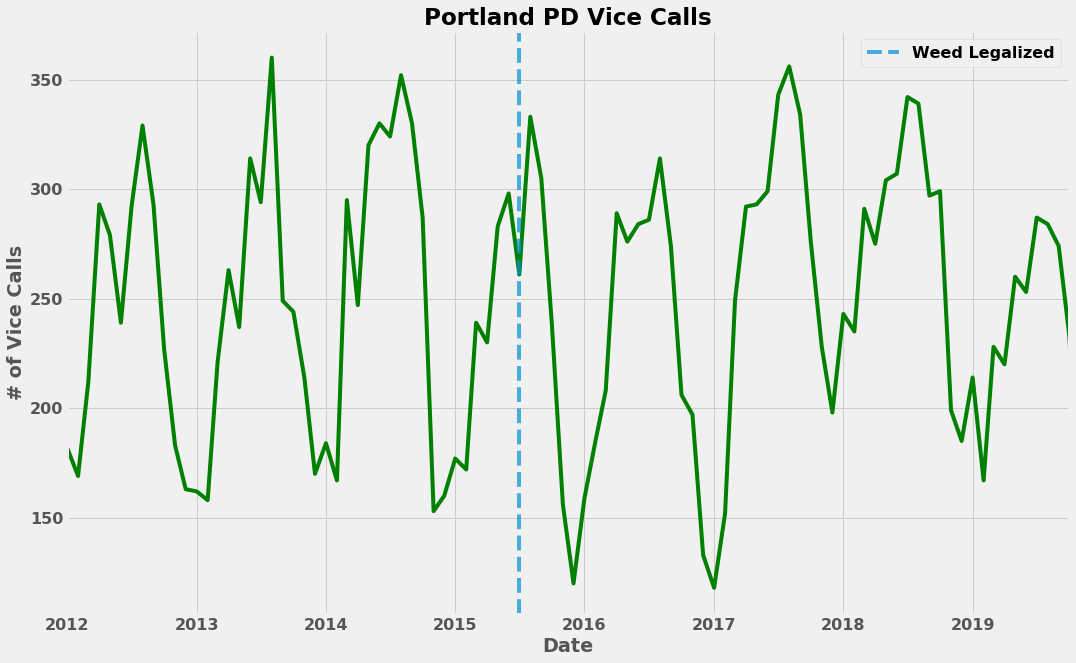

In [316]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(vc_x_vals, vc_y_vals_list, color='g')
ax.set_ylabel('# of Vice Calls', fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_xlim(min(full_df_x_vals), full_df_x_vals[-2])
ax.set_title('Portland PD Vice Calls', fontweight='bold')
plt.axvline(x="2015-07-01", label='Weed Legalized',alpha=0.7, linestyle='--')
ax.legend()
plt.savefig('../images/vice_calls_over_time.png')

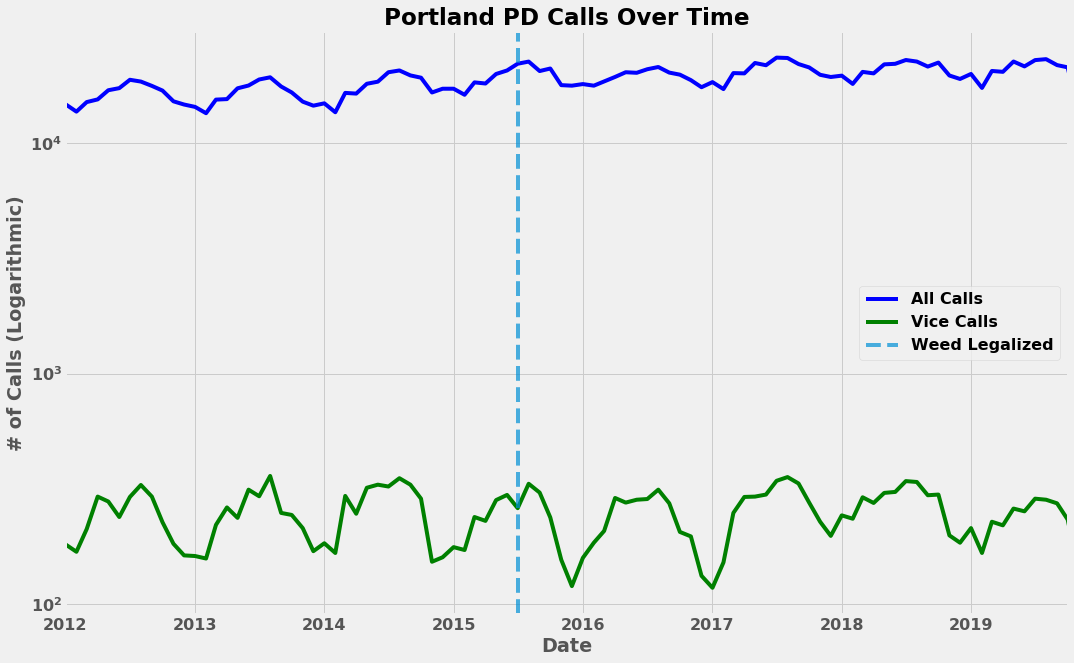

In [317]:
# Combine both graphs and add a line for weed legalization:
fig, ax = plt.subplots(figsize=(16,10))
# full count values:
ax.plot(full_df_x_vals, full_df_y_vals, label='All Calls', color='b')
# vice count values:
ax.plot(vc_x_vals, vc_y_vals_list, label='Vice Calls', color='g')
ax.set_ylabel('# of Calls (Logarithmic)', fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_xlim(min(full_df_x_vals), full_df_x_vals[-2])
ax.set_title('Portland PD Calls Over Time', fontweight='bold')
plt.yscale('log')
plt.axvline(x="2015-07-01", label='Weed Legalized',alpha=0.7, linestyle='--')
ax.legend()
plt.savefig('../images/combined_calls_and_weed_legal.png')

In [258]:
# Create a list of vice call rate per total call:
vc_y_vals_list
full_df_y_vals
vc_per_capita_list = [vc_y_vals_list[i]/full_df_y_vals[i] for i in range(len(vc_y_vals_list))]
# vc_per_capita_list

In [273]:
# Add in some points of reference for what the max and min points mean:
# For example, at the max graph point, 1 in how many calls is vice?
max_vice_per_capita = max(vc_per_capita_list)
max_vice_rate = 1/max_vice_per_capita
min_vice_per_capita = min(vc_per_capita_list)
min_vice_rate = 1/min_vice_per_capita

52.53924914675768

In [259]:
# Where do the min and max occur?
max_vice_index = vc_per_capita_list.index(max_vice_per_capita)
min_vice_index = vc_per_capita_list.index(min_vice_per_capita)
max_vice_date = full_date_range[max_vice_index]
min_vice_date = full_date_range[min_vice_index]

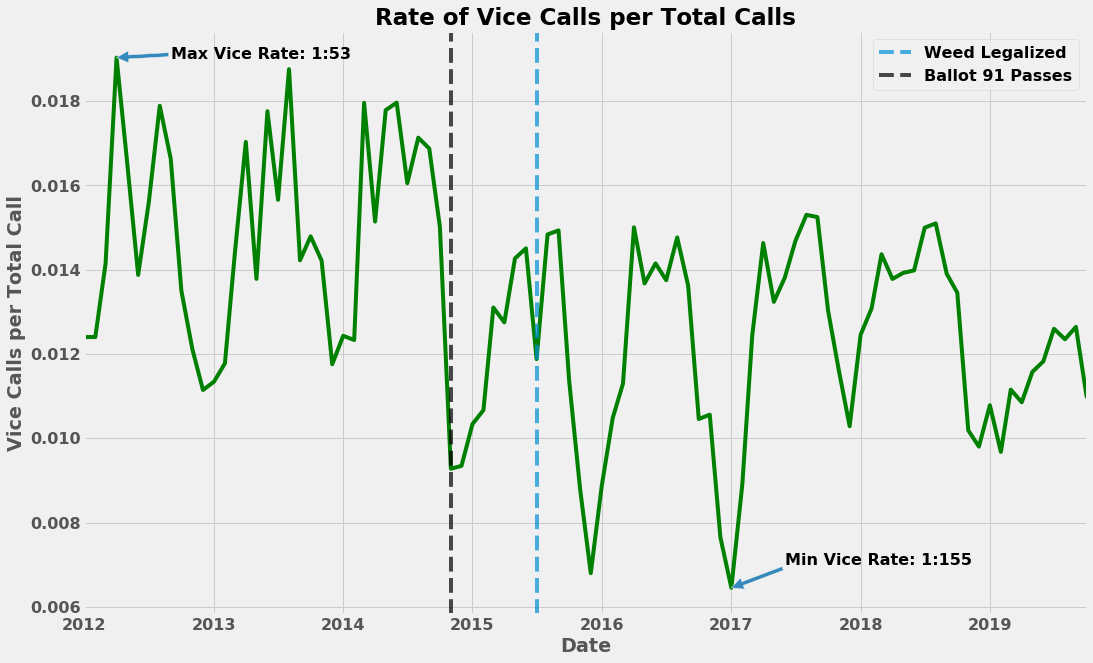

In [319]:
# And graph that rate over time:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(vc_x_vals, vc_per_capita_list, color='g')
ax.set_ylabel('Vice Calls per Total Call', fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_xlim(min(full_df_x_vals), full_df_x_vals[-2])
ax.set_title('Rate of Vice Calls per Total Calls', fontweight='bold')
ax.annotate('Max Vice Rate: 1:53', 
            xy=(max_vice_date, max_vice_per_capita),
            xytext=('2012-09-01', 0.019),
            arrowprops={})
ax.annotate('Min Vice Rate: 1:155', 
            xy=(min_vice_date, min_vice_per_capita),
            xytext=('2017-06-01', 0.007),
            arrowprops={})            
plt.axvline(x="2015-07-01", label='Weed Legalized',alpha=0.7, linestyle='--')
plt.axvline(x="2014-11-01", color='k', label='Ballot 91 Passes',alpha=0.7, linestyle='--')
ax.legend()
plt.savefig('../images/vice_rate_over_time.png')

In [ ]:
# max Crime for neighborhood = 1718